In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment3(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=1000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp3', T=T)
    exp_MAB_1.segments_means(param1=6,param2=3)
    df = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df

In [3]:
#changeable parameters
np.random.seed(1234)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 2
exp_MAB_1, df = set_experiment3(price_list=price_list, segments=segments, update_freq =10, T=T)

The true optimal arm in first 1000 rounds is: 10
The true optimal arm in the rest is: 6
time: 28.15944004058838


In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 1001
Detected Sign: -1
Detector cooling
eg triggered at  1041
arm
1.0     1.000000
4.0     1.000000
6.0     0.554539
7.0     0.637964
10.0    0.452184
11.0    0.141191
14.0    0.182644
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  1079
arm
1.0     0.314597
4.0     0.406386
6.0     0.817416
7.0     0.528969
8.0     0.062762
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
Reward change detected at time: 1437
Detected Sign: -1
Detector cooling
eg triggered at  1484
arm
1.0     0.307666
4.0     0.700764
6.0     0.633175
7.0     0.528643
8.0     0.114790
11.0    0.376505
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
Reward change detected at time: 1555
Detected Sign: -1
eg triggered at  1579
arm
1.0     0.311030
4.0     0.0937

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])

Reward change detected at time: 1002
Detected Sign: -1
eg triggered at  1041
arm
1.0     1.000000
4.0     1.000000
6.0     0.379030
7.0     0.093095
10.0    0.079661
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  1120
arm
1.0     0.374484
4.0     1.000000
6.0     0.239912
7.0     1.000000
11.0    0.534061
14.0    0.011578
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
Reward change detected at time: 1521
Detected Sign: -1
eg triggered at  1569
arm
1.0     1.000000
4.0     1.000000
6.0     0.120482
7.0     0.755535
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  1786
arm
1.0     1.000000
4.0     0.468101
6.0     0.179287
7.0     0.755813
11.0    0.548516
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested

In [6]:
# UCB1 
UCB_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB time:',end-start)
    UCB_df = UCB_df.append([np.cumsum(UCB1_re)])
    
# UCBPI family
UCBPI_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=4, bias=0, UCB1=False)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    
# TS
TS_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])

# EG
EG_df = pd.DataFrame()
EG_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG time:',end-start)
    EG_df = EG_df.append([np.cumsum(EG_re)])

trial 0 UCB time: 1.0302700996398926
trial 1 UCB time: 1.104743242263794
trial 0 UCBPI time: 0.9971818923950195
trial 1 UCBPI time: 1.2125329971313477
trial 0 TS time: 1.6988239288330078
trial 1 TS time: 1.6751048564910889
trial 0 EG time: 0.17350506782531738
trial 1 EG time: 0.15158891677856445


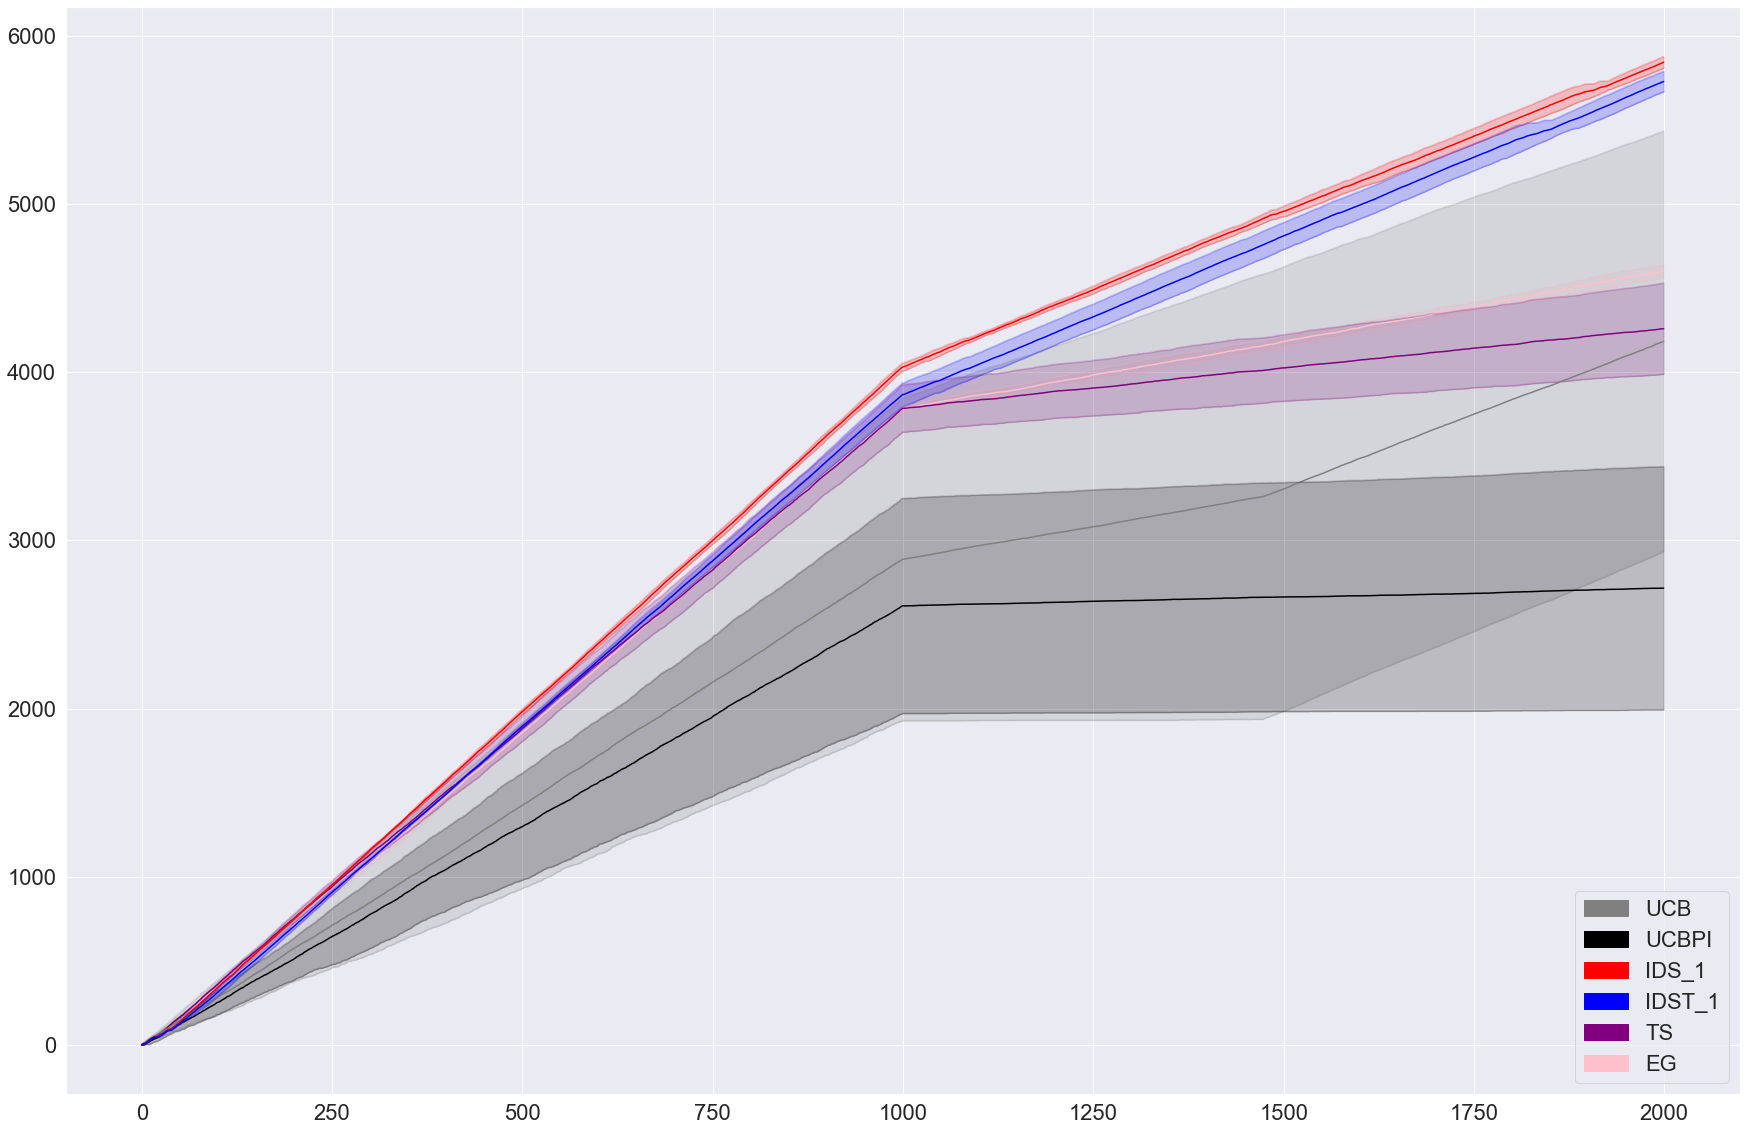

In [7]:
import matplotlib.patches as mpatches
def draw_exp_graph(IDS_1,IDST_1,UCB,UCBPI,TS, EG,sd=2):
    IDS_1_mean = IDS_1.mean()
    IDST_1_mean = IDST_1.mean()
    UCB_mean = UCB.mean()
    UCBPI_mean = UCBPI.mean()
    TS_mean = TS.mean()
    EG_mean = EG.mean()
    
    T = np.arange(IDS_1.shape[1])
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2)
    
    for i in range(EG.shape[0]):
        plt.plot(EG.iloc[i],alpha=0.2,color='pink')
    plt.plot(EG_mean,alpha=1,color='pink')
    plt.fill_between(T, EG.min(), EG.max(), color='pink', alpha=0.2)
    
    for i in range(TS.shape[0]):
        plt.plot(TS.iloc[i],alpha=0.2,color='purple')
    plt.plot(TS_mean,alpha=1,color='purple')
    plt.fill_between(T, TS.min(), TS.max(), color='purple', alpha=0.2)
    
    for i in range(UCB.shape[0]):
        plt.plot(UCB.iloc[i],alpha=0.2,color='gray')
    plt.plot(UCB_mean,alpha=1,color='gray')
    plt.fill_between(T, UCB.min(), UCB.max(), color='gray', alpha=0.2)
    
    for i in range(UCBPI.shape[0]):
        plt.plot(UCBPI.iloc[i],alpha=0.2,color='black')
    plt.plot(UCBPI_mean,alpha=1,color='black')
    plt.fill_between(T, UCBPI.min(), UCBPI.max(), color='black', alpha=0.2)

    for i in range(IDS_1.shape[0]):
        plt.plot(IDS_1.iloc[i],alpha=0.2,color='red')
    plt.plot(IDS_1_mean,alpha=1,color='red')
    plt.fill_between(T, IDS_1.min(), IDS_1.max(), color='red', alpha=0.2)
    
    for i in range(IDST_1.shape[0]):
        plt.plot(IDST_1.iloc[i],alpha=0.2,color='blue')
    plt.plot(IDST_1_mean,alpha=1,color='blue')
    plt.fill_between(T, IDST_1.min(), IDST_1.max(), color='blue', alpha=0.2)
    
    leg_UCB = mpatches.Patch(color='gray', label='UCB')
    leg_UCBPI = mpatches.Patch(color='black', label='UCBPI')
    leg_IDS_1 = mpatches.Patch(color='red', label='IDS_1')
    leg_IDST_1 = mpatches.Patch(color='blue', label='IDST_1')
    leg_TS = mpatches.Patch(color='purple', label='TS')
    leg_EG = mpatches.Patch(color='pink', label='EG')
    
    plt.legend(handles=[leg_UCB, leg_UCBPI, leg_IDS_1, leg_IDST_1, leg_TS, leg_EG], loc= 'lower right')
    plt.show()

    
draw_exp_graph(IDS_1_df,IDST_1_df,UCB_df,UCBPI_df,TS_df,EG_df,sd=1)

IDS_1


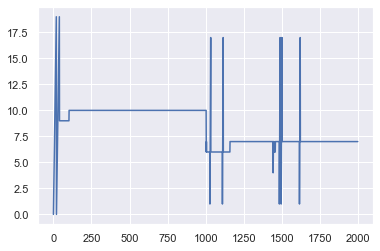

1.8112280701754382
collection rounds: 65
IDST_1


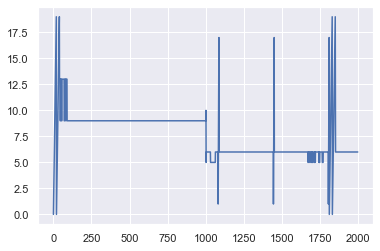

1.7486175438596494
collection rounds: 95
UCB1


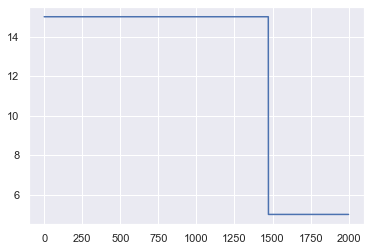

1.8972912280701757
UCBPI


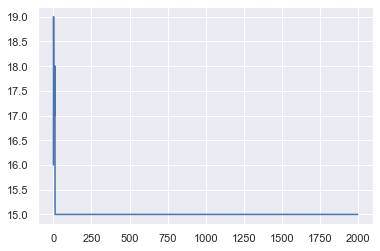

0.0263859649122807
TS


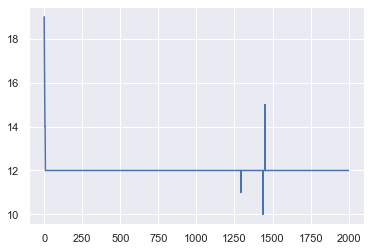

0.0263859649122807
EG


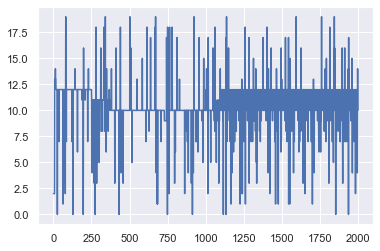

0.0263859649122807


In [8]:
sns.set(font_scale=1)
print('IDS_1')
plt.plot(IDS_1_arm)
plt.show()
print(IDS_1_re[-300:].mean())
print('collection rounds:', IDS_1.collection_rounds)

print('IDST_1')
plt.plot(IDST_1_arm)
plt.show()
print(IDST_1_re[-300:].mean())
print('collection rounds:', IDST_1.collection_rounds)

print('UCB1')
plt.plot(UCB1_arm)
plt.show()
print(UCB1_re[-300:].mean())

print('UCBPI')
plt.plot(UCBPI_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('TS')
plt.plot(TS_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('EG')
plt.plot(EG_arm)
plt.show()
print(UCBPI_re[-300:].mean())